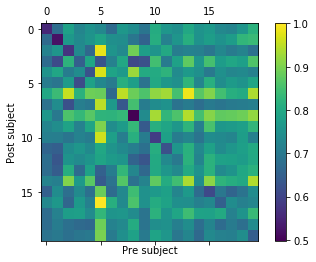

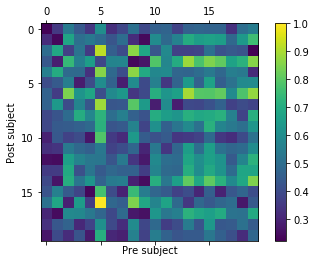

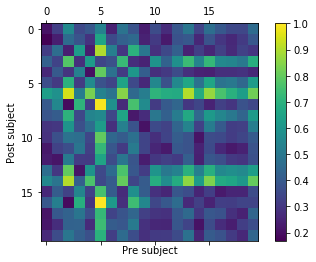

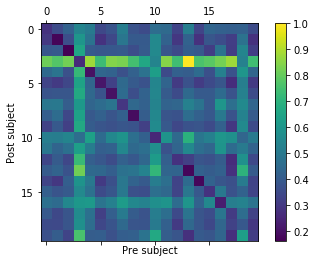

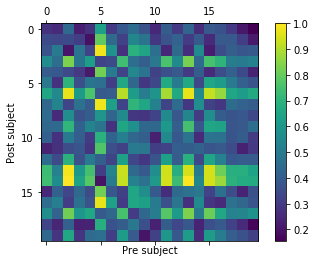

(6724,)
[  0.           5.67110559  26.13523991 ..., -24.7314285  -37.2998799    0.        ]


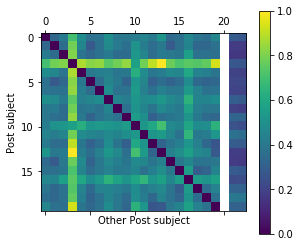

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))
F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


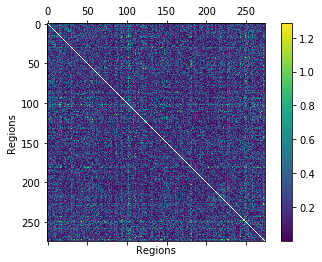

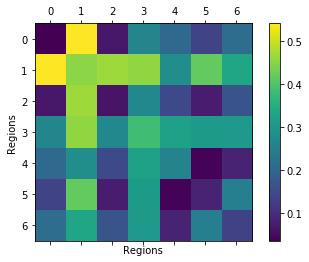

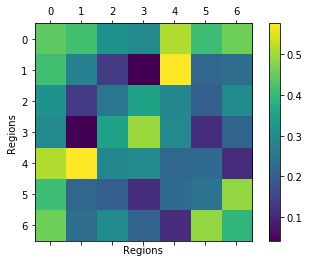

Success rate: 6 / 10


In [1]:
%run 'exploration-v1.ipynb'

# Dimensionality reduction

In order to prevent overfitting due to the large data-size compared to number of samples, we perform dimensionality reduction on our data.

We have 5 types of reducers:

- Null-RS Reducer
  * A simple passthrough reduction on RSFC, where all information is preserved as-is
- Yeo-RS Reducer
  * Reduction based on Yeo 7-Region Parcellation on RSFC
- Hierarchical Clustering RS Reducer
  * Reduction based on Hierarchical Clustering on RSFC of 20 Training Subjects
- Null FS Reducer
  * A simple passthrough reduction on DTI Connectivity, where all information is preserved as-is
- Hierarchical Clustering FS Reducer
  * Reduction based on Hierarchical Clustering on DTI Connectivity of 20 Training Subjects

### Hierarchical Clustering

First, in order to assess whether or not there exist opportunities for further clustering the brain regions, we evaluate the dendrogram on the correlation matrix and reorganize the clusters to highlight co-firing regions in the resting state connectivity.

Data Visualization


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


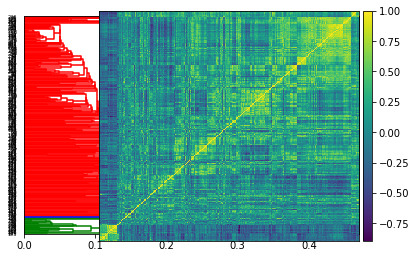

In [2]:
main.data_vis()

Based on the qualitative appearance of the data, we identify that there are clusters, of variable size, present in our data structure. We may also visualize the locations of the these clusters in spatial coordinates:

Cluster Visualization


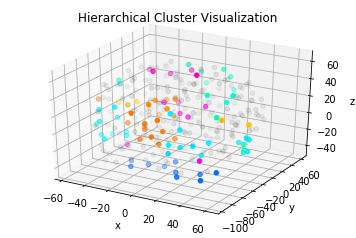

In [3]:
main.cluster_vis(yeo=False)

### Yeo Parcellation

In addition to the hierarchically clustered model, we also evaluate the efficacy of clustering based on the 7-region parcellation by Yeo et al. based on nearest-neighbor matching of the regions in Talairach space.

Cluster Visualization


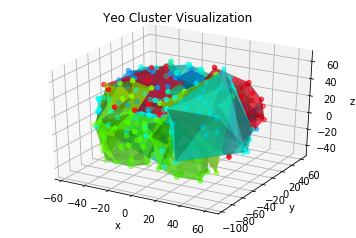

In [4]:
main.cluster_vis()

# Similarity Matrices

We evaluate how "similar" subjects are, pre- to post- training, by means of correlation; overall, we see clear diagonal trends in the matrices, which indicate evidence of autocorrelation. Note that the matrices themselves represent euclidean distance of vectorized representations of connectivity, so *lower* values represent *higher* similarities.

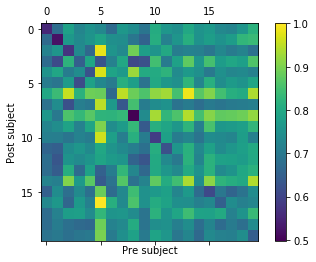

In [5]:
fig = plotSimilarityMatrix(subjects, nullRSreducer)

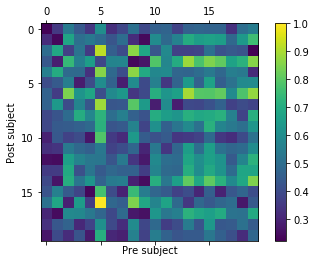

In [6]:
fig = plotSimilarityMatrix(subjects, clusteringRSreducer)

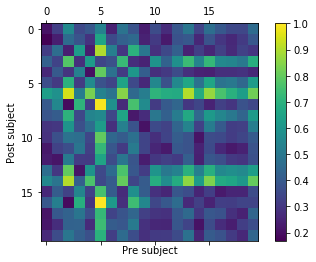

In [7]:
fig = plotSimilarityMatrix(subjects, yeoRSreducer)

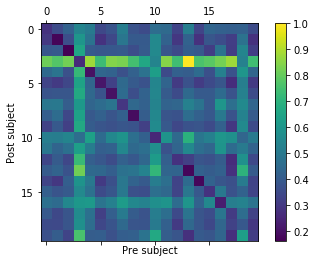

In [8]:
fig = plotSimilarityMatrix(subjects, nullFSreducer)

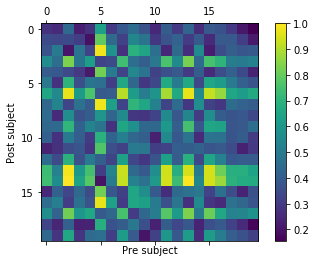

In [9]:
fig = plotSimilarityMatrix(subjects, clusteringFSreducer)

# Directionality modelling

In our directionality analysis, we quantify observable intra- and inter-subject trends in order to answer our two questions: how much of subject identity, as explained by RSFC, is retained and whether or not subjects demonstrate predictable change in brain regions connectivity.

### Predictive Analysis

Provided that there exist uniform directionality across all subjects, it should be possible to predict the post-training connectivity solely based on pre-training connectivity and the knowledge of directionality. Here, we assess this assumption.

In [10]:
subjects['delta'] = subjects.reducedPost - subjects.reducedPre
subjects.head()

,folder,data,reducedPre,reducedPost,delta,forecastedPost
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f69fae96a90>,"[0.0, 411.6548583, 245.835252436, 227.17283950...","[0.0, 438.531027467, 256.727595386, 340.524038...","[0.0, 26.8761691673, 10.8923429502, 113.351198...","[0.0, 417.325963887, 271.970492344, 253.084212..."
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f69fad15290>,"[0.0, 266.594594595, 83.2254616132, 87.4235924...","[0.0, 549.92690678, 86.6288461538, 118.7257844...","[0.0, 283.332312185, 3.40338454063, 31.3021919...","[0.0, 272.265700182, 109.360701521, 113.334965..."
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f69fad1aed0>,"[0.0, 893.836875359, 209.549833095, 164.518681...","[0.0, 714.309027778, 115.080357143, 120.571847...","[0.0, -179.527847581, -94.469475952, -43.94683...","[0.0, 899.507980946, 235.685073003, 190.430054..."
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f69fad29810>,"[0.0, 370.537787514, 456.880110243, 251.801619...","[0.0, 730.798572157, 511.17877338, 271.5162548...","[0.0, 360.260784643, 54.2986631363, 19.7146354...","[0.0, 376.208893101, 483.015350152, 277.712992..."
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f69fad15910>,"[0.0, 744.692073171, 306.807620818, 136.982681...","[0.0, 702.096537251, 225.512285582, 110.604432...","[0.0, -42.5955359199, -81.295335236, -26.37824...","[0.0, 750.363178758, 332.942860726, 162.894054..."


In [11]:
meanDelta = np.mean(subjects.delta)
print meanDelta.shape
print meanDelta

(6724,)
[  0.           5.67110559  26.13523991 ..., -24.7314285  -37.2998799    0.        ]


In [12]:
subjects['forecastedPost'] = subjects.reducedPre + meanDelta
subjects.head()

,folder,data,reducedPre,reducedPost,delta,forecastedPost
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f69fae96a90>,"[0.0, 411.6548583, 245.835252436, 227.17283950...","[0.0, 438.531027467, 256.727595386, 340.524038...","[0.0, 26.8761691673, 10.8923429502, 113.351198...","[0.0, 417.325963887, 271.970492344, 253.084212..."
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f69fad15290>,"[0.0, 266.594594595, 83.2254616132, 87.4235924...","[0.0, 549.92690678, 86.6288461538, 118.7257844...","[0.0, 283.332312185, 3.40338454063, 31.3021919...","[0.0, 272.265700182, 109.360701521, 113.334965..."
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f69fad1aed0>,"[0.0, 893.836875359, 209.549833095, 164.518681...","[0.0, 714.309027778, 115.080357143, 120.571847...","[0.0, -179.527847581, -94.469475952, -43.94683...","[0.0, 899.507980946, 235.685073003, 190.430054..."
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f69fad29810>,"[0.0, 370.537787514, 456.880110243, 251.801619...","[0.0, 730.798572157, 511.17877338, 271.5162548...","[0.0, 360.260784643, 54.2986631363, 19.7146354...","[0.0, 376.208893101, 483.015350152, 277.712992..."
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f69fad15910>,"[0.0, 744.692073171, 306.807620818, 136.982681...","[0.0, 702.096537251, 225.512285582, 110.604432...","[0.0, -42.5955359199, -81.295335236, -26.37824...","[0.0, 750.363178758, 332.942860726, 162.894054..."


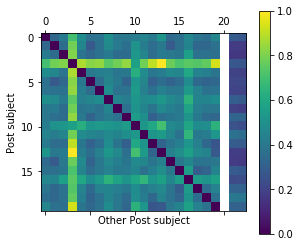

In [13]:
dirMatrix = np.zeros([len(subjects), len(subjects) + 3])
for i, post in subjects.reducedPost.iteritems():
    # For each post scan
    for j, otherpost in subjects.reducedPost.iteritems():
        # How similar is it to each pre scan
        dirMatrix[i-1, j-1] = dist_func(post, otherpost)
    
    # How similar is it to its own pre scan?
    dirMatrix[i-1,-1] = dist_func(subjects.forecastedPost[i], post)
    # How similar is it to the prediction?
    dirMatrix[i-1,-2] = dist_func(subjects.reducedPre[i], post)
    
    dirMatrix[i-1,-3] = float('nan')

dirMatrix /= np.nanmax(dirMatrix)

cax = plt.matshow(dirMatrix)

plt.colorbar(cax)
# plt.title('Correlation between incomming and outgoing scans')
plt.xlabel('Other Post subject')
plt.ylabel('Post subject')

plt.savefig('DirectionMap.png', dpi=500, transparent=True)

## Regional Directionality

In order to observe whether or not there exist consistent trends in how regional connectivity change pre- to post-training, we plot the effect size of pre- and post- Resting-State Functional Connectivity data, as well as evaluate ANOVA on the distribution of change in regional connectivity on the respective reduction methods:

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))
F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


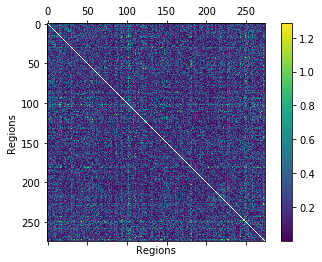

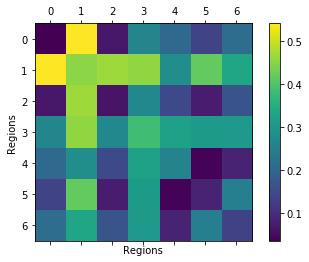

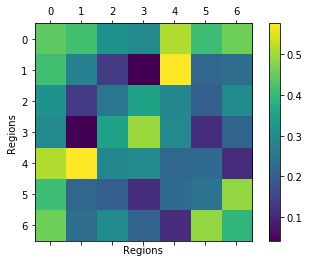

In [14]:
fig = plotRegionalChange(subjects, nullRSreducer)
fig = plotRegionalChange(subjects, yeoRSreducer)
fig = plotRegionalChange(subjects, clusteringRSreducer)

The resultant plot validates our motivation behind dimensionality reduction: that with 77284-dimensional data and 20 samples, we are bound to observe a large directionality in at least one of the datasets. The small p-value from our ANOVA test, with the null hypothesis that the regional changes are drawn from the same distribution, validates this result.

On the other hand, the effect-sizes, of medium range(~0.5) obtained from the clustering analysis is relatively more credible, and demonstrates consistent trends in specific regional connectivities.

## SVM-based Directionality Prediction

Whereas we have observed large p-values in the previous ANOVA test, we seek to validate the results on basis of whether or not we can classify pre-to-post directionality data with an SVM classifier.

In [15]:
res, classifier = trainSvm(subjects, clusteringRSreducer)
res, classifier = trainSvm(subjects, yeoRSreducer)
res, classifier = trainSvm(subjects, nullRSreducer)

Success rate: 6 / 10
Success rate: 0 / 10
Success rate: 4 / 10


Here, we observe that, interestingly, the SVM based on the Yeo-7 Parcellated clusters consistently perform worse than random.